### Multiple Subplots
Notice that a non-square number of plots generates blank axis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.linspace(0,1,10)
y = x**2

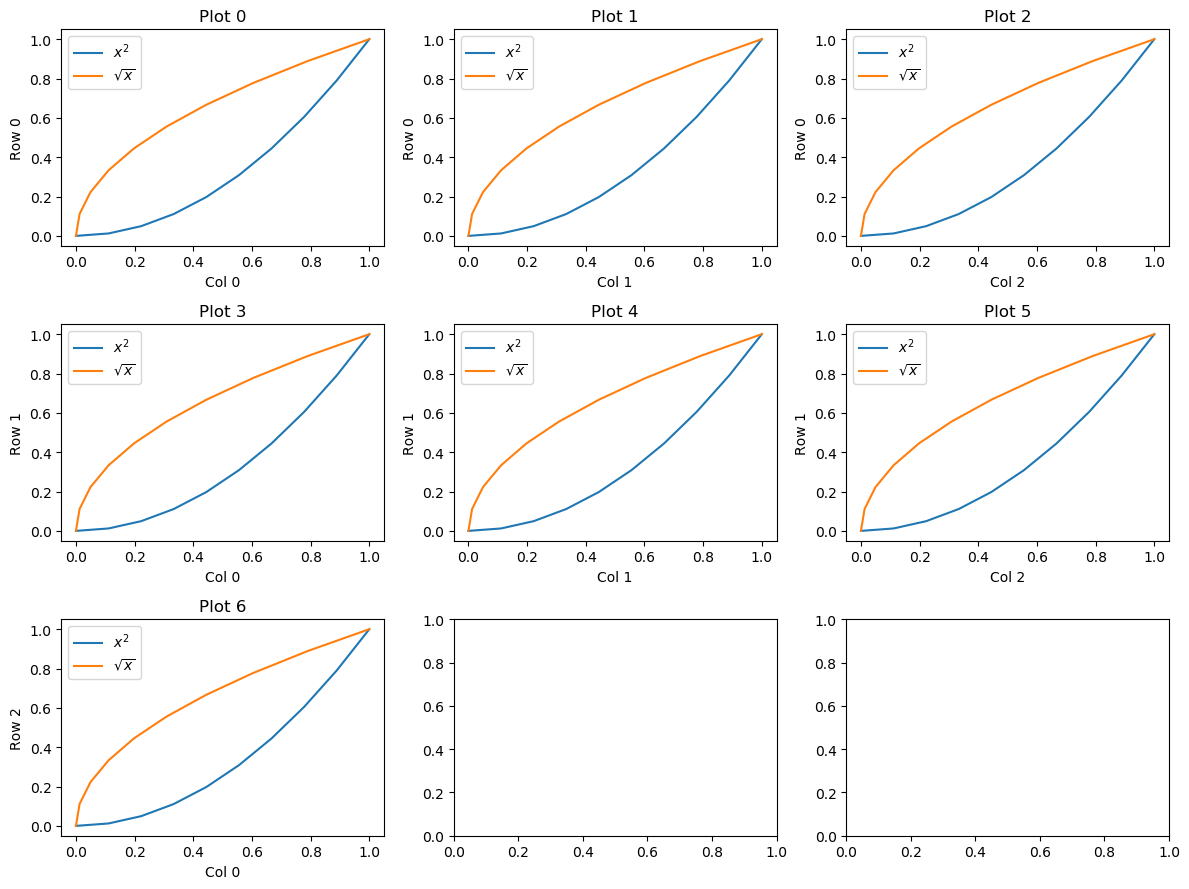

In [3]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(12,9),dpi=100)
for i in range(7):
	axes[i//3][i%3].plot(x,y,label='$x^2$')
	axes[i//3][i%3].plot(y,x,label='$\sqrt{x}$')
	axes[i//3][i%3].legend()
	axes[i//3][i%3].set_title('Plot '+str(i))
	axes[i//3][i%3].set_ylabel('Row '+ str(i//3))
	axes[i//3][i%3].set_xlabel('Col '+ str(i%3))
plt.tight_layout()
plt.show()

### To gert rid of blank axes, set all axes off and set on after plotting

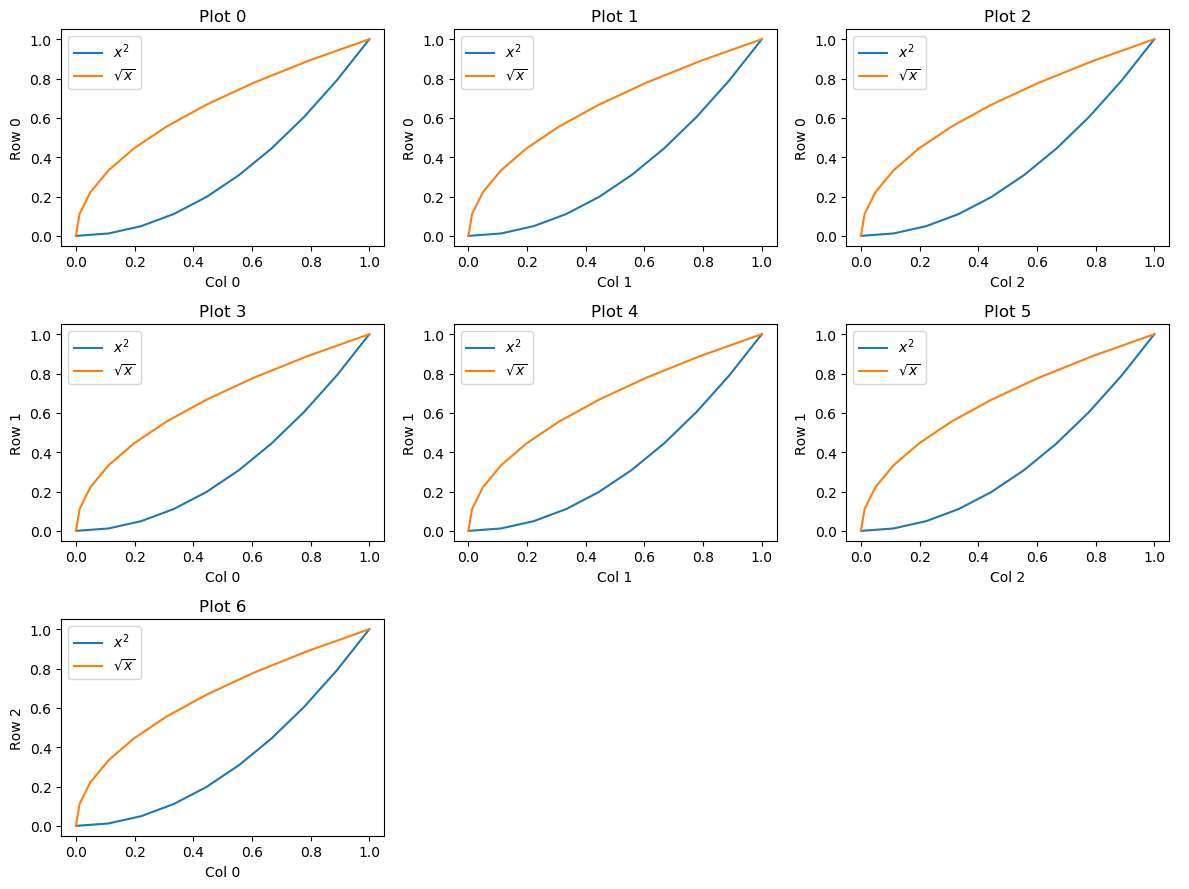

In [4]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(12,9),dpi=100)
[axi.set_axis_off() for axi in axes.ravel()] # Makes all  axes invisible
for i in range(7):
	axes[i//3][i%3].plot(x,y,label='$x^2$')
	axes[i//3][i%3].plot(y,x,label='$\sqrt{x}$')
	axes[i//3][i%3].legend()
	axes[i//3][i%3].set_title('Plot '+str(i))
	axes[i//3][i%3].set_ylabel('Row '+ str(i//3))
	axes[i//3][i%3].set_xlabel('Col '+ str(i%3))
	axes[i//3][i%3].set_axis_on() # makes axes with plot visible
plt.tight_layout()
plt.show()

In [5]:
def scatter_matrix_lower(df):
    """ Plots lower triangle of scatter matrix """

    def corrfunc(x, y, **kwargs):
        """ Calculates Pearson's R and annotates axis
        Use on seaborn scatter matrix"""
        r, _ = stats.pearsonr(x, y)
        r2 = r ** 2
        ax = plt.gca()
        ax.annotate("$r^2$ = {:.2f}".format(r2),
                    xy=(.1, .9), xycoords=ax.transAxes, fontsize='x-small')

    def slope_intercept(x, y, **kwargs):
        """ Calculates slope + intercept and annotates axis
        Use on seaborn scatter matrix"""
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        ax = plt.gca()
        ax.annotate("y={0:.1f}x+{1:.1f}".format(slope, intercept),
                    xy=(.1, .9), xycoords=ax.transAxes, fontsize='x-small')

    grid = sns.PairGrid(data=df, vars=list(df), height=1)
    for m, n in zip(*np.triu_indices_from(grid.axes, k=0)):
        grid.axes[m, n].set_visible(False)
    grid = grid.map_lower(plt.scatter, s=0.2)
    grid.map_lower(corrfunc)
    grid.set(alpha=1)
    grid.fig.suptitle('Air Temperature (°C)')
# plt.rcParams["axes.labelsize"] = 11

In [38]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns

cols="ref sens1 sens2 sens3 sens4 sens5 sens6 sens7".split()

df = pd.DataFrame(np.random.rand(253, 8) * 25, columns=cols)

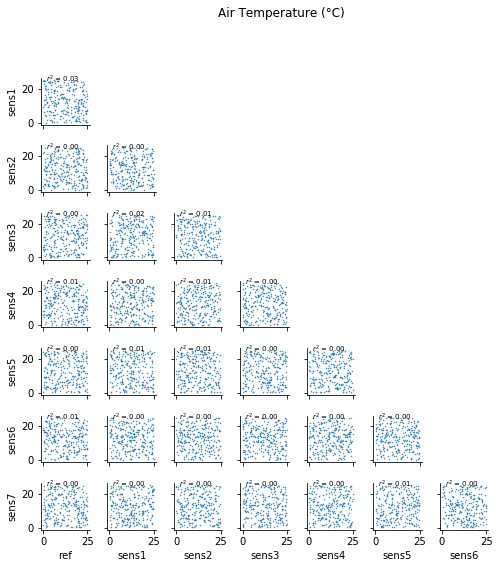

In [39]:
scatter_matrix_lower(df)